<a href="https://colab.research.google.com/github/leedabin2/regression/blob/main/%5B%EB%AC%B8%EC%A0%9C1%5D12193152_%EC%9D%B4%EB%8B%A4%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [문제1] 독버섯 데이터를 이용하여 의사결정나무, 로지스틱회귀분석, xgboost의 예측성능을 
# 각각 비교하시오

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
mr = pd.read_csv('drive/MyDrive/data/Mushroom.csv')
mr

,Edibility,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Popluation,Habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [ ]:
smp = pd.get_dummies(mr, drop_first=True) # 범주형 데이터를 숫자형으로 바꾸는 더미 사용 
smp

,Edibility_POISONOUS,Cap-shape_CONICAL,Cap-shape_CONVEX,Cap-shape_FLAT,Cap-shape_KNOBBED,Cap-shape_SUNKEN,Cap-surface_GROOVES,Cap-surface_SCALY,Cap-surface_SMOOTH,Cap-color_BUFF,...,Popluation_NUMEROUS,Popluation_SCATTERED,Popluation_SEVERAL,Popluation_SOLITARY,Habitat_LEAVES,Habitat_MEADOWS,Habitat_PATHS,Habitat_URBAN,Habitat_WASTE,Habitat_WOODS
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8412,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
8413,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8414,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
smp_X = smp.iloc[:,1:] # 설명변수
smp_y = smp.iloc[:,0] # 목표변수
smp_y.value_counts(normalize=True)
# 독버섯이 46%비중을 차지함

0    0.53327
1    0.46673
Name: Edibility_POISONOUS, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

ratio = 0.2
trn_X, tst_X, trn_y, tst_y = train_test_split(smp_X, smp_y, test_size=ratio, stratify=smp_y)
    
print("training data", trn_X.shape, trn_y.shape)
print("testing data", tst_X.shape, tst_y.shape)

training data (6732, 95) (6732,)
testing data (1684, 95) (1684,)


In [ ]:
# 학습데이터의 종속변수
trn_y.value_counts(normalize = True)

0    0.533274
1    0.466726
Name: Edibility_POISONOUS, dtype: float64

In [ ]:
p0 = 0.533274
p1 = 0.466726
-(p0*np.log2(p0) + p1*np.log2(p1))
# 엔트로피가 0.996 이므로 엔트로피가 높다고 볼 수 있다.

0.9968030520531121

# depth 2 ~ 10 변화
-학습성능과 평가성능의 비교

In [ ]:
from sklearn import tree # depth 3 

clf3 = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf3 = clf3.fit(trn_X, trn_y)

In [ ]:
r = tree.export_text(clf3, feature_names=list(trn_X.columns), show_weights=True)
print(r)
# odor_none 이 0과 1로 나누어 냄새유무를 나눔 / 엔트로피가 0이 아닌 경우는 더욱 분류할 수 있음.

|--- Odor_NONE <= 0.50
|   |--- Bruises_NO <= 0.50
|   |   |--- Stalk-root_CLUB <= 0.50
|   |   |   |--- weights: [234.00, 440.00] class: 1
|   |   |--- Stalk-root_CLUB >  0.50
|   |   |   |--- weights: [415.00, 0.00] class: 0
|   |--- Bruises_NO >  0.50
|   |   |--- weights: [0.00, 2606.00] class: 1
|--- Odor_NONE >  0.50
|   |--- Spore-print-color_GREEN <= 0.50
|   |   |--- Stalk-surface-below-ring_SCALY <= 0.50
|   |   |   |--- weights: [2928.00, 6.00] class: 0
|   |   |--- Stalk-surface-below-ring_SCALY >  0.50
|   |   |   |--- weights: [13.00, 32.00] class: 1
|   |--- Spore-print-color_GREEN >  0.50
|   |   |--- weights: [0.00, 58.00] class: 1



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (41.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and dir

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

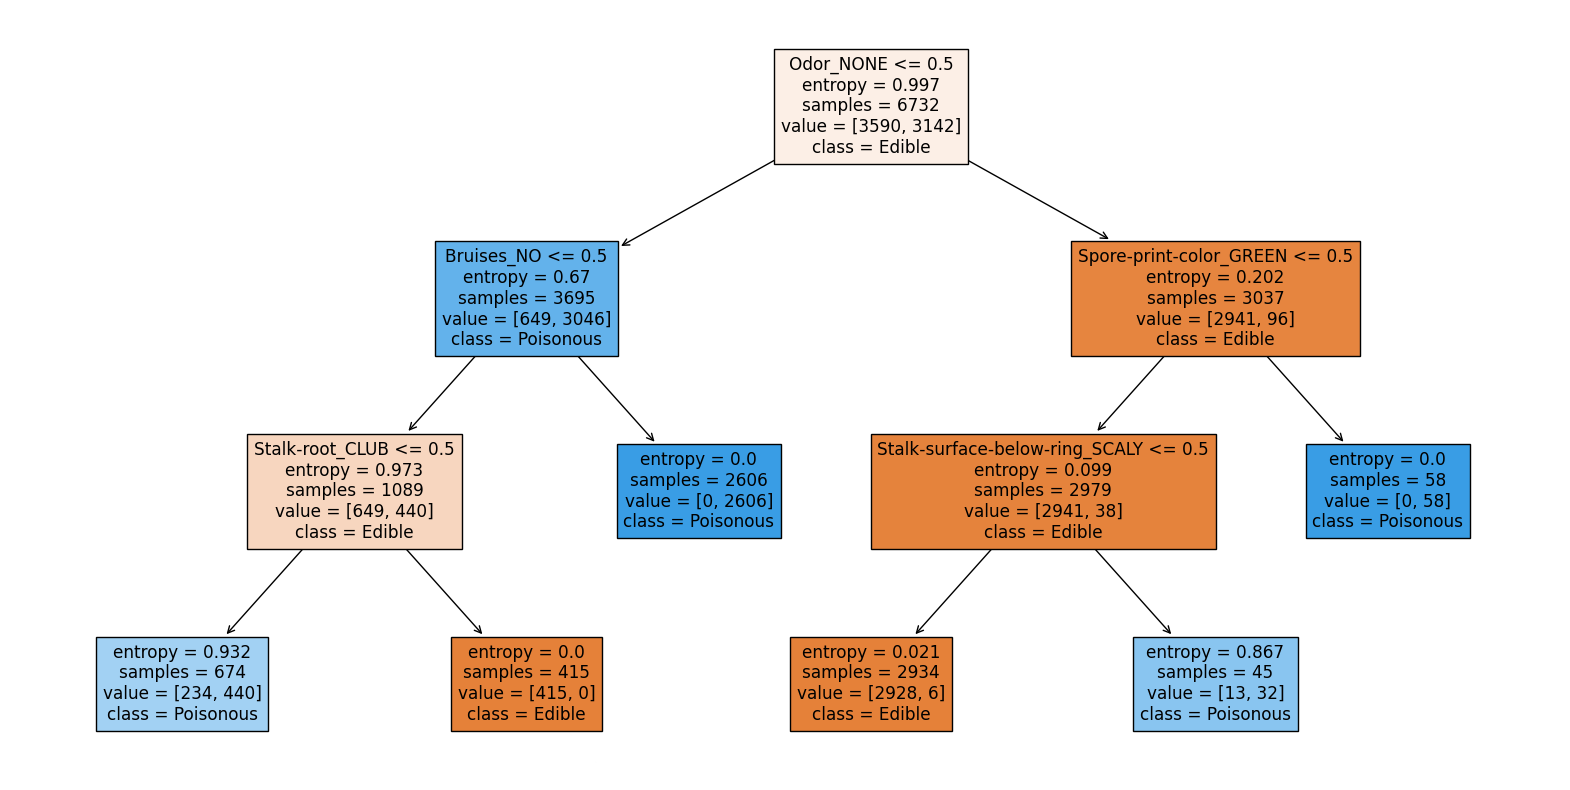

In [ ]:
plt.subplots(figsize=(20,10))
tree.plot_tree(clf3, class_names=['Edible','Poisonous'], feature_names=list(trn_X), filled=True);

# 만약 value = [234,440] 의 경우에서 cut-off기준을 몇퍼센트로 잡느냐에 따라서 234개(독버섯이라고 인식했는데 실제로는 식용버섯인 데이터)는 학습오차가 발생할 수 있다. 
# 반면 value = [415,0] 은 학습오차가 없다.

In [ ]:
pd.crosstab(clf3.predict(trn_X), trn_y) # trn_y : 실제로 출력해야 할 독버섯 유무 
# 독버섯 이라고 했는데 실제론 식용버섯  247+6

Edibility_POISONOUS,0,1
row_0,,
0,3343,6
1,247,3136


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

의사결정나무, xgboost 모델의 depth 변화로 살펴본 예측성능 비교

In [ ]:
# 의사결정나무
for d in range(2,11): # depth를 11까지 올리면 어떻게 되는지 확인
  clf_tr = DecisionTreeClassifier(max_depth=d)
  score_t = cross_validate(clf_tr,smp_X,smp_y,cv=5,return_train_score=True)
  print("train: %.3f test: %.3f" % (score_t['train_score'].mean(),score_t['test_score'].mean()))
# 학습데이터는 좋아지나 평가데이터는 낮아질수도 잇음

train: 0.958 test: 0.853
train: 0.989 test: 0.782
train: 0.995 test: 0.780
train: 0.998 test: 0.780
train: 0.998 test: 0.780
train: 1.000 test: 0.780
train: 1.000 test: 0.769
train: 1.000 test: 0.782
train: 1.000 test: 0.780


In [ ]:
# xgboost 
import xgboost as xgb 
for d in range(2,11): # depth를 11까지 올리면 어떻게 되는지 확인
  clf_xgb =xgb.XGBClassifier(max_depth=d)
  score = cross_validate(clf_xgb,smp_X,smp_y,cv=5,return_train_score=True)
  print("train: %.3f test: %.3f" % (score['train_score'].mean(),score['test_score'].mean()))

# 주어진 결과는 트리의 깊이를 증가시킬수록 모델의 학습 데이터에 대한 성능은 계속해서 향상되나, 평가데이터는 트리의 깊이가 5를 넘어가자 모델이 일반화 수준이 떨어진다. 
# 이는 학습데이터가 과적합되면서 평가데이터의 일반화 성능이 떨어진 것임을 추측가능케 한다.
# 따라서 적절한 트리 깊이를 선택하여 모델의 일반화 성능을 최적화 해야 한다.

train: 1.000 test: 0.788
train: 1.000 test: 0.786
train: 1.000 test: 0.786
train: 1.000 test: 0.780
train: 1.000 test: 0.780
train: 1.000 test: 0.780
train: 1.000 test: 0.780
train: 1.000 test: 0.780
train: 1.000 test: 0.780


* 의사결정나무 모델의 평가 성능은 xgboost 모델보다 변동성이 크게 나타나고, 깊이에 따라 차이가 있다. 이는 의사결정나무가 단일 트리로 이루어져 있어서 깊이에 따라 분할 기준이 달라지고, 결과적으로 성능에도 차이가 나타나는 것으로 해석할 수 있다.

* 의사결정나무 모델의 평가 성능은 깊이가 커질수록 학습 데이터의 성능은 점차 증가하지만, 평가 데이터에 대한 일반화 성능은 깊이가 일정 수준을 벗어나면 변화가 없거나 약간의 감소한다. 이는 의사결정나무의 깊이가 깊어질수록 과적합할 가능성이 있음을 보여준다.

* 의사결정나무와 xgboost 모델을 비교해볼 때, 의사결정나무 모델은 깊이에 따라 평가 성능이 큰 변동을 보이며 과적합 현상이 나타날 수 있다. 반면 xgboost 모델은 깊이가 일정 수준 이상에서는 성능 변화가 작고 일반화 성능을 유지할 수 있는 장점이 있다는 차이가 있다.

# - 교차검증 비교

5-fold cross_validation 비교

In [ ]:
from sklearn.model_selection import cross_validate
import xgboost as xgb

clf_t = DecisionTreeClassifier(max_depth=5) # 의사결정나무 모델을 초기화, max_depth = 5 설정
clf_r = LogisticRegression(max_iter=1000)
clf_xgb = xgb.XGBClassifier(max_depth=5)


score_t = cross_validate(clf_t, smp_X, smp_y, cv=5, return_train_score=True) # 의사결정나무 모델에 대한 5-fold 교차 검증을 수행
score_r = cross_validate(clf_r, smp_X, smp_y, cv=5,  return_train_score=True) # 로지스틱회귀분석 모델에 대한 5-fold 교차 검증을 수행
score_xgb = cross_validate(clf_xgb,smp_X,smp_y,cv=5, return_train_score=True) # xgboost 모델에 대한 5-fold 교차 검증을 수행

In [ ]:
for k, v in score_t.items(): # tree
    print("%s : %.3f" %(k, v.mean()))
# 평가데이터 성능은 0.782로 평균정도 높다고 볼 수 있음
# 학습데이터 성능은 0.998로 모델의 적합도가 높음

fit_time : 0.093
score_time : 0.006
test_score : 0.780
train_score : 0.998


In [ ]:
for k, v in score_r.items(): # 로지스틱회귀분석
    print("%s : %.3f" %(k, v.mean()))
# 학습데이터 성능은 1.000로 모델의 적합도가 높으나 이는 모델이 과적합 가능성이 있음을 암시
# 평가데이터 성능은 0.78로 평균정도 높다고 볼 수 있음

fit_time : 0.351
score_time : 0.003
test_score : 0.780
train_score : 1.000


In [ ]:
for k, v in score_xgb.items(): # xgboodst 평가성능비교 
    print("%s : %.3f" %(k, v.mean()))
# 학습데이터 성능은 1.000로 모델의 적합도가 높으나 이는 모델이 과적합 가능성이 있음을 암시
# 평가데이터 성능은 0.78로 평균정도 높다고 볼 수 있음

fit_time : 1.699
score_time : 0.005
test_score : 0.780
train_score : 1.000


10-fold cross_validation 비교

In [ ]:
from sklearn.model_selection import cross_validate
import xgboost as xgb

clf_t = DecisionTreeClassifier(max_depth=10) # 의사결정나무 모델을 초기화, max_depth = 10 설정
clf_r = LogisticRegression(max_iter=1000)
clf_xgb = xgb.XGBClassifier(max_depth=10)


score_t = cross_validate(clf_t, smp_X, smp_y, cv=10, return_train_score=True) # 의사결정나무 모델에 대한 10-fold 교차 검증을 수행
score_r = cross_validate(clf_r, smp_X, smp_y, cv=10,  return_train_score=True) # 로지스틱회귀분석 모델에 대한 10-fold 교차 검증을 수행
score_xgb = cross_validate(clf_xgb,smp_X,smp_y,cv=10, return_train_score=True) # xgboost 모델에 대한 10-fold 교차 검증을 수행

In [ ]:
for k, v in score_t.items(): # tree
    print("%s : %.3f" %(k, v.mean()))

fit_time : 0.034
score_time : 0.002
test_score : 0.911
train_score : 1.000


In [ ]:
for k, v in score_r.items(): # 로지스틱회귀분석
    print("%s : %.3f" %(k, v.mean()))

fit_time : 0.300
score_time : 0.002
test_score : 0.914
train_score : 1.000


In [ ]:
for k, v in score_xgb.items(): # xgboost
    print("%s : %.3f" %(k, v.mean()))

fit_time : 2.149
score_time : 0.004
test_score : 0.927
train_score : 1.000


* 5-fold cross_validation에 비해서 10-fold cross_validation의 학습성능과 평가성능이 모두 높아졌다. 이와 같이 차이가 나는 이유는 더 많은 데이터를 사용하여 모델을 학습할 수 있습니다. 10-fold 에서 더 많은 데이터를 사용함으로써 모델이 더욱 일반화된 학습을 수행할 수 있고, 결과적으로 평가 데이터에서 더 높은 성능을 보일 수 있다. 그러나 학습데이터에서 1.000은 모델이 과적합할 가능성이 있음을 염두해야 한다.

# 10-fold cross_validation으로 비교한 3가지 예측 성능

In [ ]:
imp['columns'] = smp.columns[1:]
imp['importance'] = clf3.feature_importances_
imp.sort_values('importance', ascending=False).head(10)

# 의사결정나무로 알아본 중요도가 높은 속성

,columns,importance
23,Odor_NONE,0.604957
17,Bruises_NO,0.236975
42,Stalk-root_CLUB,0.072231
79,Spore-print-color_GREEN,0.053685
48,Stalk-surface-below-ring_SCALY,0.032153
62,Stalk-color-below-ring_ORANGE,0.000000
69,Veil-color_YELLOW,0.000000
68,Veil-color_WHITE,0.000000
67,Veil-color_ORANGE,0.000000
66,Stalk-color-below-ring_YELLOW,0.000000


10-fold cross_validation 비교

In [ ]:
x = pd.DataFrame({
    'Odor_NONE': smp['Odor_NONE'],
    'Bruises_NO': smp['Bruises_NO'],
    'Stalk-root_CLUB': smp['Stalk-root_CLUB'],
    'Spore-print-color_GREEN': smp['Spore-print-color_GREEN'],
    'Stalk-surface-below-ring_SCALY': smp['Stalk-surface-below-ring_SCALY']
}) # 5개 선택변수
y = smp.iloc[:,0] # 목표변수

In [ ]:
from sklearn.model_selection import cross_validate
import xgboost as xgb

clf_t = DecisionTreeClassifier(max_depth=10) # 의사결정나무 모델을 초기화, max_depth = 10 설정
clf_r = LogisticRegression(max_iter=1000)
clf_xgb = xgb.XGBClassifier(max_depth=10)


score_t = cross_validate(clf_t, x, y, cv=10, return_train_score=True) # 의사결정나무 모델에 대한 10-fold 교차 검증을 수행
score_r = cross_validate(clf_r, x, y, cv=10,  return_train_score=True) # 로지스틱회귀분석 모델에 대한 10-fold 교차 검증을 수행
score_xgb = cross_validate(clf_xgb, x, y,cv=10, return_train_score=True) # xgboost 모델에 대한 10-fold 교차 검증을 수행

In [ ]:
for k, v in score_t.items(): # tree
    print("%s : %.3f" %(k, v.mean()))

fit_time : 0.006
score_time : 0.003
test_score : 0.945
train_score : 0.986


In [ ]:
for k, v in score_r.items(): # 로지스틱회귀분석
    print("%s : %.3f" %(k, v.mean()))

fit_time : 0.046
score_time : 0.004
test_score : 0.946
train_score : 0.983


In [ ]:
for k, v in score_xgb.items(): # xgboost
    print("%s : %.3f" %(k, v.mean()))

fit_time : 0.187
score_time : 0.004
test_score : 0.951
train_score : 0.986


* 의사결정나무 모델의 평가 성능(0.945)은 로지스틱 회귀분석 모델(0.946)과 비슷하며, Xgboost 모델 과 비교했을 때 (0.951)보다는 약간 낮음

* Xgboost 모델은 다른 두 모델보다 더 높은 평가 성능을 보임

* 모든 모델의 학습 성능은 비슷한 수준으로 유지되고 있음을 보아, 평가 성능에서는 Xgboost 모델이 가장 좋은 성능을 보이고 있다.
